### Project: Computational models for robot-induced hallucinations in Parkinson’s Disease
### Laboratory of Cognitive Neuroscience - LNCO
### Author: Duarte Rodrigues
##### Script: This document serves to make a validation check, whether more training images affect the accuracy of the pose estimation given by DeepLabCut. It uses the Root Mean Square Error distance between the predictions and the labels, for the different projects.

##### It was used to compare the effects of using only 5 frames per participant to 25, with a 5 frame increment (5 projects). It was also used to compare the different angles, in study 1, since there is a different number of participants per angle (RL RD LL LD Full[everything together])

In [59]:
'''Main libraries import'''
import pandas as pd
import numpy as np
from IPython.display import display
import motionAnalysisFX
from matplotlib import pyplot as plt
import math

In [83]:
''' Function to deal and correct the NaN values, either by trimming the beggining or substituting the 
ones in the middle by the previous known number.'''
def nanout(sign):
    start_nan=False
    c=0
    # print(len(sign))

    if math.isnan(float(sign[0])):    
        
        count = 0
        # This loop removes the initial NaN that are in the beginning of the signal
        for i in range(len(sign)):
            sign[i]=float(sign[i])
            if math.isnan(sign[i]):
                count = count + 1
            else:
                break
        sign = sign[count:]
    
    #This loop identifies a NaN in the middle of the signal and substitutes it by the previous number    
    for i in range(len(sign)):
        sign[i]=float(sign[i])
        if math.isnan(sign[i]):
            sign[i] = sign[i-1]
            
    return sign


robot_top


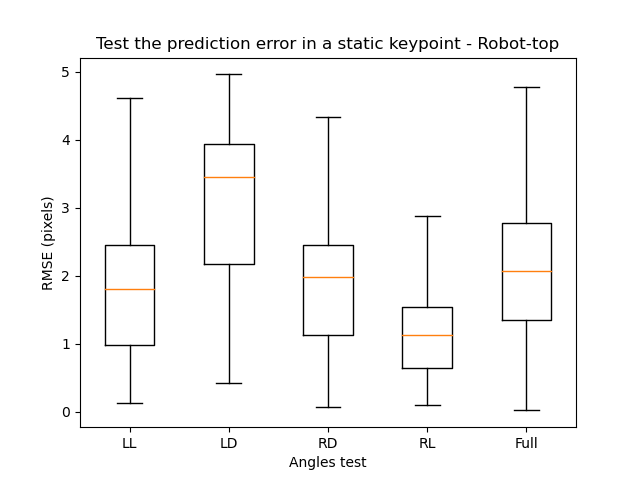

In [92]:
''' The dist files already has information regaridng the likelihood of how correct a prediction is and 
the root mean square error when compared to the groundtruth labels.

In this cell, I take those dist.csv files, for the model snapshot with lowest test error, and 
compare the root mean square error (RMSE) between the different models.

It's comparing if using more frames increases the accuracy of the model.'''

v='16' # Arbitrary body part RMSE - In the dist.csv files the organization of the columns is different.


# The data file is loaded and then the NaN holes are trimmed or covered, for each of the projects' snapshots.
p5 = r"D:\_users\Duarte_Projects\ma_LL_Final_Crop-Duarte-2022-06-02\evaluation-results\iteration-0\ma_LL_Final_CropJun2-trainset95shuffle1\dist_450000.csv"
df5 = pd.read_csv(p5)
print(df5['Duarte.'+v][1]) # Selected body part
l05=nanout(list(df5['Duarte.'+v][3:]))

p10 = r"D:\_users\Duarte_Projects\maLD_Crop-Duarte-2022-06-10\evaluation-results\iteration-0\maLD_CropJun10-trainset95shuffle1\dist_450000.csv"
df10 = pd.read_csv(p10)
l10=nanout(list(df10['Duarte.'+v][3:]))

p15 = r"D:\_users\Duarte_Projects\ma_RD-Duarte-2022-06-17\evaluation-results\iteration-0\ma_RDJun17-trainset95shuffle1\dist_300000.csv"
df15 = pd.read_csv(p15)
l15=nanout(list(df15['Duarte.'+v][3:]))

p20 = r"D:\_users\Duarte_Projects\ma_RL-Duarte-2022-06-20\evaluation-results\iteration-0\ma_RLJun20-trainset95shuffle1\dist_500000.csv"
df20 = pd.read_csv(p20)
l20=nanout(list(df20['Duarte.'+v][3:]))

p25 = r"D:\_users\Duarte_Projects\ma_FullModel-Duarte-2022-07-01\evaluation-results\iteration-0\ma_FullModelJul1-trainset95shuffle1\dist_350000.csv"
df25 = pd.read_csv(p25)
l25=nanout(list(df25['Duarte.'+v][3:]))


# Plotting the model comparison
%matplotlib widget
fig1, ax1 = plt.subplots()
ax1.set_title('Test the prediction error in a static keypoint - Robot-top')
data=[l05, l10, l15, l20, l25]
# print(data)
ax1.boxplot(data,showfliers=False)
plt.ylabel('RMSE (pixels)')
plt.xlabel('Angles test')
plt.xticks([1, 2, 3, 4, 5], ['LL', 'LD', 'RD', 'RL', 'Full'])

plt.show()
